In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
images_path = './images'
os.system('mkdir -p {}'.format(images_path))

0

## 1D model system

### Potential Energy Function

In [3]:
def pot_energy(x):
    if x < -1.25:
        return (4 * (np.pi**2)) * (x + 1.25)**2

    if x >= -1.25 and x <= -0.25:
        return 2 * (1 + np.sin(2 * np.pi * x))

    if x >= -0.25 and x <= 0.75:
        return 3 * (1 + np.sin(2 * np.pi * x))

    if x >= 0.75 and x <= 1.75:
        return 4 * (1 + np.sin(2 * np.pi * x))

    # if x >= 1.75:
    return 8 * (np.pi**2) * ((x - 1.75) ** 2)

In [5]:
oned_range = np.linspace(-2, 2.25, 1000)
pot_graph = np.array([pot_energy(i) for i in oned_range])

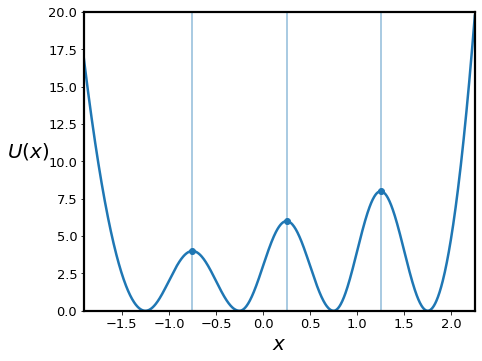

In [49]:
fig, ax = plt.subplots(figsize = (7, 5.5))
plt.plot(oned_range, pot_graph, lw = 2.5)
plt.xlim([-1.9, 2.25])
plt.ylim([0, 20])
maximas = np.array([-0.75, 0.25, 1.25])
U_maximas = np.array([pot_energy(i) for i in maximas])
plt.scatter(maximas, U_maximas)

for i in maximas:
    plt.axvline(x = i, alpha = 0.5)
_ = plt.xticks(fontsize = 13)
_ = plt.yticks(fontsize = 13)
plt.xlabel(r'$x$', fontsize = 20)
ylabel = plt.ylabel(r'$U(x)$', fontsize = 20, labelpad = 20)
ylabel.set_rotation(0)
_ = [i.set_linewidth(2.2) for i in ax.spines.values()]
plt.savefig(os.path.join(images_path, 'U.png'))

### Mean work

In [50]:
%%bash
mkdir -p /scratch/shaunak/1D
rsync -aPsq ada:/share1/shaunak/1D_Run/langevin_rens_* /scratch/shaunak/1D/

In [55]:
exchanges_oned = []
file_loc_oned = '/scratch/shaunak/1D'
for i in range(14):
    exchanges_oned.append(pd.read_csv(os.path.join(file_loc_oned, 'langevin_rens_{}'.format(i), 'exchanges.txt')))

In [57]:
w_mean_oned = [i['W'].mean() for i in exchanges_oned]
p_acc_oned = [i['Exchanged'].mean() for i in exchanges_oned]

In [58]:
taus_oned_dict = {"rens_0" : 0.0,  "rens_1" : 0.1,  "rens_2" : 0.2576,  "rens_3" : 0.3721,  "rens_4" : 0.79432823,  "rens_5" : 1.54169365,  "rens_6" : 2.0,  "rens_7" : 5.0,  "rens_8" : 14.0,  "rens_9" : 22.0,  "rens_10" : 35.0,  "rens_11" : 49.0,  "rens_12" : 69.0,  "rens_13" : 100.0}
taus_oned = np.array(list(taus_oned_dict.values()))
f_SW_oned = taus_oned / (6.0 + taus_oned)

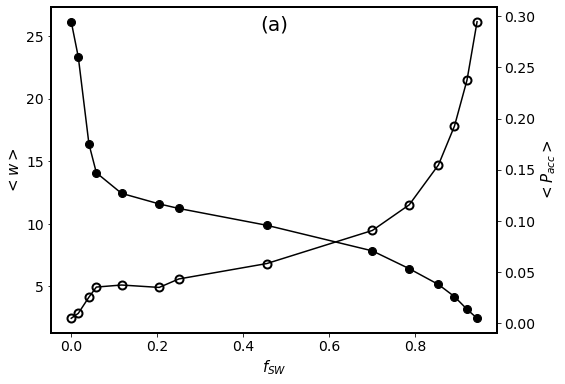

In [65]:
fig, ax1 = plt.subplots(figsize = (8, 6))
ax1.plot(f_SW_oned, w_mean_oned, marker = 'o', color = 'black', markersize = 8)


ax1.set_xlabel(r'$f_{SW}$', fontsize = 15)
ax1.set_ylabel(r'$<w>$', fontsize = 15)
ax1.tick_params(labelsize = 14)
plt.title('(a)', y = 0.91, fontsize = 20)

ax2 = ax1.twinx()
ax2.set_ylabel(r'$<P_{acc}>$', fontsize = 15)
ax2.plot(f_SW_oned, p_acc_oned, color = 'black', marker = 'o', markerfacecolor = 'none', 
         markeredgecolor = 'black', markersize = 8, markeredgewidth = 2)
ax2.tick_params(labelsize = 14)
_ = [i.set_linewidth(2) for i in ax2.spines.values()]
# plt.savefig(os.path.join(images_path, 'w_mean_leps.png'), bbox_inches = 'tight') 

### Probability distribution

In [85]:
from scipy.integrate import quad
beta_oned = 1 / (0.3)
f_oned = lambda x:np.exp(-beta_oned * pot_energy(x))
Z_oned = quad(f_oned, -np.inf, np.inf)[0]
expected_oned = np.array([f_oned(i) for i in oned_range]) / Z_oned

#### REMD

* Change the particle position to the one closest in the paper

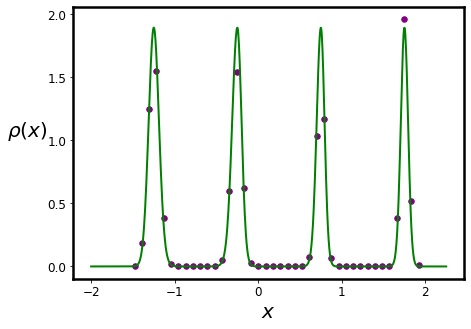

In [117]:
fig, ax = plt.subplots(figsize = (7, 5))
p_oned_rens, be_oned_rens = np.histogram(pos_values[:, 0], bins = 40, density = True)
coords_oned = 0.5 * (be_oned_rens[1:] + be_oned_rens[:-1])

plt.plot(oned_range, expected_oned, color = 'green', lw = 2)
plt.scatter(coords_oned, p_oned_rens, color = 'purple', s = 30)

_ = [i.set_linewidth(2.5) for i in ax.spines.values()]
_ = plt.xlabel(r'$x$', fontsize = 20)
_ = plt.ylabel(r'$\rho(x)$', fontsize = 20, labelpad = 20)
plt.yticks(np.arange(0, 2.5, 0.5), fontsize = 12)
plt.xticks(fontsize = 12)

_.set_rotation(0)

#### RENS

In [69]:
# all_positions = []
# for i in range(14):
#     all_positions.append(np.loadtxt(os.path.join(file_loc_oned, 'langevin_rens_{}/0'.format(i), 'p.txt')))
pos_oned = np.loadtxt(os.path.join(file_loc_oned, 'langevin_rens_0/0'.format(i), 'p.txt'))

In [71]:
ind = (pos_oned[:, -1] == 0)
pos_values = pos_oned[ind, 1:-1]

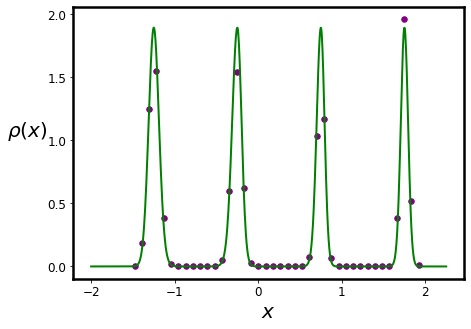

In [116]:
fig, ax = plt.subplots(figsize = (7, 5))
p_oned_rens, be_oned_rens = np.histogram(pos_values[:, 0], bins = 40, density = True)
coords_oned = 0.5 * (be_oned_rens[1:] + be_oned_rens[:-1])

plt.plot(oned_range, expected_oned, color = 'green', lw = 2)
plt.scatter(coords_oned, p_oned_rens, color = 'purple', s = 30)

_ = [i.set_linewidth(2.5) for i in ax.spines.values()]
_ = plt.xlabel(r'$x$', fontsize = 20)
_ = plt.ylabel(r'$\rho(x)$', fontsize = 20, labelpad = 20)
plt.yticks(np.arange(0, 2.5, 0.5), fontsize = 12)
plt.xticks(fontsize = 12)

_.set_rotation(0)

### Muller Brown potential

#### Potential energy function

### LEPS potential

In [11]:
from LEPS import LEPS_II_Mod as L_II_Mod
from LEPS import LEPS_II as L_II
from LEPS import LEPS_I as L_I

V_LEPS_II_Mod = L_II_Mod().V
V_LEPS_II = L_II().V
V_LEPS_I = L_I().V

In [12]:
rAB_II, x = np.meshgrid(np.arange(0.2, 4.1, 0.05), np.arange(-3.4, 3.4, 0.05))
l = rAB_II.flatten().shape[0]
LEPS_I = np.zeros(l)
LEPS_II = np.zeros(l)

LEPS_II_Mod = np.zeros(l)
for i in np.arange(l):
    LEPS_I[i] = V_LEPS_I(rAB_II.flatten()[i], x.flatten()[i])
    LEPS_II[i] = V_LEPS_II(rAB_II.flatten()[i], x.flatten()[i])
    LEPS_II_Mod[i] = V_LEPS_II_Mod(rAB_II.flatten()[i], x.flatten()[i])
LEPS_I = LEPS_I.reshape(rAB_II.shape)    
LEPS_II = LEPS_II.reshape(rAB_II.shape)
LEPS_II_Mod = LEPS_II_Mod.reshape(rAB_II.shape)

In [13]:
def plot_graph(mode = 2):
    fig = plt.figure(figsize = (8, 8))

    ax = fig.add_subplot(1, 1, 1)
    pes = LEPS_II_Mod
    title = 'LEPS_II_Mod'
    if mode == 0:
        pes = LEPS_I
        title = 'LEPS_I'
    if mode == 1:
        pes = LEPS_II
        title = 'LEPS_II'
    C = plt.contourf(rAB_II, x, pes, cmap="Blues_r", levels = np.linspace(-4.6, 10, 30))
    plt.colorbar()
    ax.contour(rAB_II, x, pes, colors='white', levels = np.linspace(-4.6, 10, 20), alpha = 0.3, linewidths = 2)
    ax.set_xlabel('$r_\mathrm{AB}$', fontsize = 16)
    ax.set_title(title, fontsize = 20)
    if mode == 0:
        _ = ax.set_ylim(0.5, 3.2)
        ax.set_ylabel('$r_\mathrm{BC}$', fontsize = 16)
    else:
        ax.set_ylabel('$x$', fontsize = 16)
        
    _ = ax.set_xlim(0.3, 3.4)

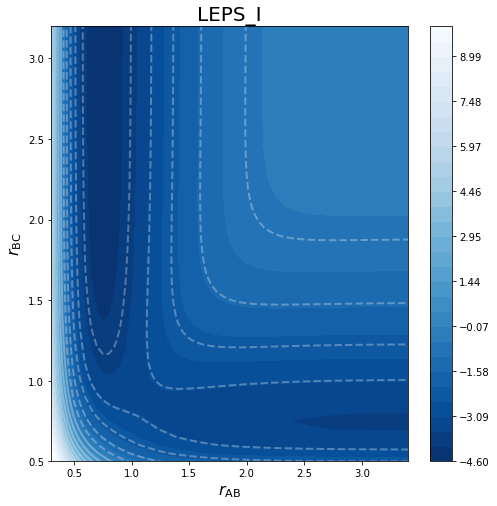

In [14]:
plot_graph(mode = 0)
plt.savefig(os.path.join(images_path, 'LEPS_I.png'), bbox_inches = 'tight')

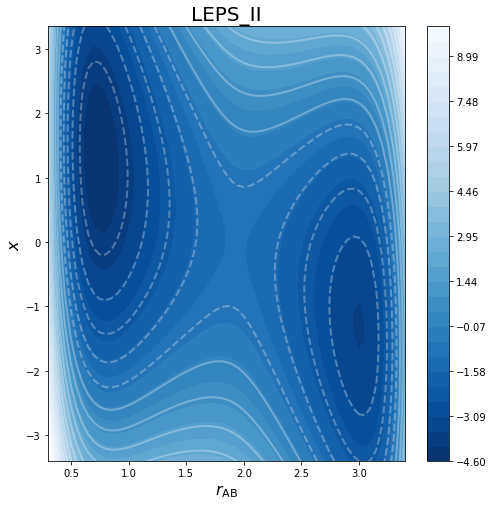

In [15]:
plot_graph(mode = 1)
plt.savefig(os.path.join(images_path, 'LEPS_II.png'), bbox_inches = 'tight')

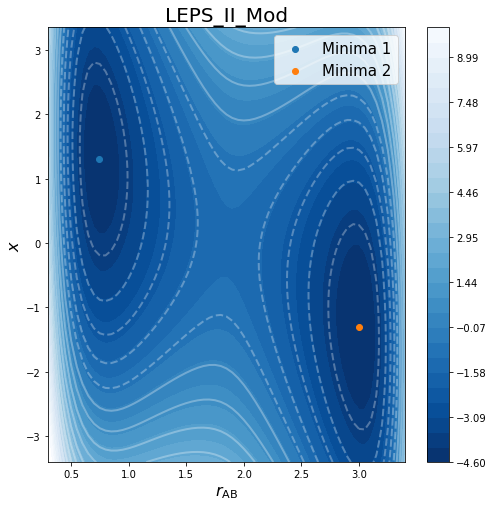

In [16]:
plot_graph(mode = 2)
plt.scatter(0.742, 1.303, label = 'Minima 1')
plt.scatter(3.001, -1.303, label = 'Minima 2')
plt.legend(loc = 'best', fontsize = 15)
plt.savefig(os.path.join(images_path, 'LEPS_II_Mod.png'), bbox_inches = 'tight')

## LJ

In [17]:
def U(r):
    sigma = 3.4
    epsilon = 8.8
    
    l = (sigma / r)**6
    return 4 * epsilon * (l**2 - l)

In [18]:
l = np.linspace(3.25, 8, 1000)
LJ_U = U(l)

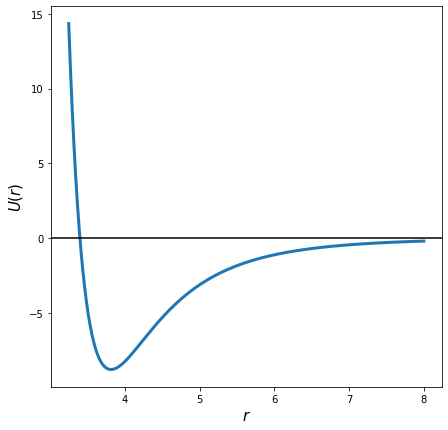

In [19]:
fig = plt.figure(figsize = (7, 7))
plt.plot(l, LJ_U, lw = 3)
plt.axhline(y = 0, color = 'black')
plt.xlabel(r'$r$', fontsize = 15)
plt.ylabel(r'$U(r)$', fontsize = 15)
plt.savefig(os.path.join(images_path, 'LJ.png'))

## Results for both these model systems

### Mean work and acceptance probability

In [20]:
%%bash
mkdir -p /scratch/shaunak/LJ 
mkdir -p /scratch/shaunak/leps_2_mod
rsync -aPsq ada:/share1/shaunak/leps_2_mod/rens_* /scratch/shaunak/leps_2_mod/
rsync -aPsq ada:/share1/shaunak/LJ_Run_80_105/* /scratch/shaunak/LJ/

In [21]:
!ls /scratch/shaunak/LJ

LJ_rens_0  LJ_rens_2  LJ_rens_4  LJ_rens_6  LJ_rens_8
LJ_rens_1  LJ_rens_3  LJ_rens_5  LJ_rens_7  LJ_rens_9


In [24]:
exchanges_lj = []
file_loc = '/scratch/shaunak/LJ'

for i in range(10):
    exchanges_lj.append(pd.read_csv(os.path.join(file_loc, 'LJ_rens_{}/exchanges.txt'.format(i))))

In [26]:
w_mean = [i['W'].mean() for i in exchanges_lj]
p_acc = [i['Exchanged'].mean() for i in exchanges_lj]

tau_values_lj = {"rens_0" : 0.0,  "rens_1" : 1.0,  "rens_2" : 2.0,  "rens_3" : 5.0,  "rens_4" : 10.0,  "rens_5" : 20.0,  "rens_6" : 40.0,  "rens_7" : 60.0,  "rens_8" : 80.0,  "rens_9" : 100.0}

taus_lj = np.array(list(tau_values.values()))

f_SW_lj = taus_lj / (6.0 + taus_lj)

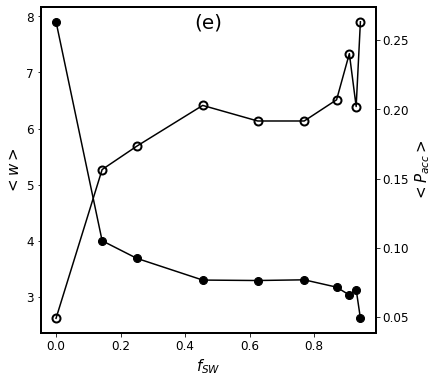

In [233]:
fig, ax1 = plt.subplots(figsize = (6, 6))
ax1.plot(f_SW_lj, w_mean, marker = 'o', color = 'black', markersize = 8)

ax1.set_xlabel(r'$f_{SW}$', fontsize = 15)
ax1.set_ylabel(r'$<w>$', fontsize = 15)
ax1.tick_params(labelsize = 12)
plt.title('(e)', y = 0.98, fontsize = 20)


ax2 = ax1.twinx()
ax2.set_ylabel(r'$<P_{acc}>$', fontsize = 15)
ax2.plot(f_SW_lj, p_acc, color = 'black', marker = 'o', markerfacecolor = 'none', 
         markeredgecolor = 'black', markersize = 8, markeredgewidth = 2)
ax2.tick_params(labelsize = 12)
_ = [i.set_linewidth(2) for i in ax2.spines.values()]
plt.savefig(os.path.join(images_path, 'w_mean_lj.png'), bbox_inches = 'tight')

In [228]:
exchanges_leps = []
file_loc = '/scratch/shaunak/leps_2_mod'

for i in range(10):
    exchanges_leps.append(pd.read_csv(os.path.join(file_loc, 'rens_{}/exchanges.txt'.format(i))))

In [229]:
w_mean_leps = [i['W'].mean() for i in exchanges_leps]
p_acc_leps = [i['Exchanged'].mean() for i in exchanges_leps]

tau_values_leps = {"rens_0" : 0.0,  "rens_1" : 0.1,  "rens_2" : 0.2576,  "rens_3" : 0.3721,  "rens_4" : 0.79432823,  "rens_5" : 1.54169365,  "rens_6" : 2.0,  "rens_7" : 5.0,  "rens_8" : 14.0,  "rens_9" : 22.0,  "rens_10" : 35.0,  "rens_11" : 49.0,  "rens_12" : 69.0,  "rens_13" : 100.0}
taus_leps = np.array(list(tau_values.values()))

f_SW_leps = taus_leps / (6.0 + taus_leps)

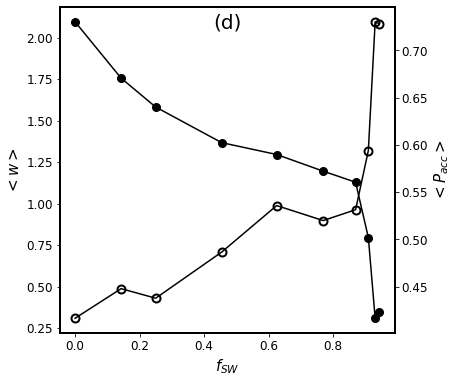

In [232]:
fig, ax1 = plt.subplots(figsize = (6, 6))
ax1.plot(f_SW_leps, w_mean_leps, marker = 'o', color = 'black', markersize = 8)


ax1.set_xlabel(r'$f_{SW}$', fontsize = 15)
ax1.set_ylabel(r'$<w>$', fontsize = 15)
ax1.tick_params(labelsize = 12)
plt.title('(d)', y = 0.98, fontsize = 20)

ax2 = ax1.twinx()
ax2.set_ylabel(r'$<P_{acc}>$', fontsize = 15)
ax2.plot(f_SW_leps, p_acc_leps, color = 'black', marker = 'o', markerfacecolor = 'none', 
         markeredgecolor = 'black', markersize = 8, markeredgewidth = 2)
ax2.tick_params(labelsize = 12)
_ = [i.set_linewidth(2) for i in ax2.spines.values()]
plt.savefig(os.path.join(images_path, 'w_mean_leps.png'), bbox_inches = 'tight') 

### Probability distribution

In [135]:
pos = np.loadtxt(os.path.join(file_loc, 'rens_5/0/p.txt'))

ind = (pos[:, -1]) == 0

pos = pos[ind]

In [165]:
from LEPS import LEPS_II_Mod as L_II_Mod
V_LEPS_Mod = L_II_Mod().V
rAB_II, x = np.meshgrid(np.arange(0.2, 3.5, 0.05), np.arange(-2, 3, 0.05))
l = rAB_II.flatten().shape[0]
LEPS_II = np.zeros(l)
for i in np.arange(l):
    LEPS_II[i] = V_LEPS_Mod(rAB_II.flatten()[i], x.flatten()[i])
LEPS_II = LEPS_II.reshape(rAB_II.shape)

In [166]:
xedges = np.linspace(rAB_II[0, 0], rAB_II[0, -1], 20)
yedges = np.linspace(x[0, 0], x[-1, 0], 20)
H, xedges, yedges = np.histogram2d(pos[:, 1], pos[:, 2], bins = (xedges, yedges), density = True)
# H, xedges, yedges = np.histogram2d(pos[:, 1], pos[:, 2], density = True)
# Histogram does not follow Cartesian convention (see Notes),
# therefore transpose H for visualization purposes.
H = H.T

x_a, y_a = np.meshgrid((xedges[1:] + xedges[:-1]) / 2, (yedges[1:] + yedges[:-1]) / 2)

In [167]:
from LEPS import Z_LEPS, Free_energy
T = 0.3
Z = Z_LEPS(T)
kB = 1
beta = 1 / (kB * T)
exp = np.exp(-beta * LEPS_II) / Z

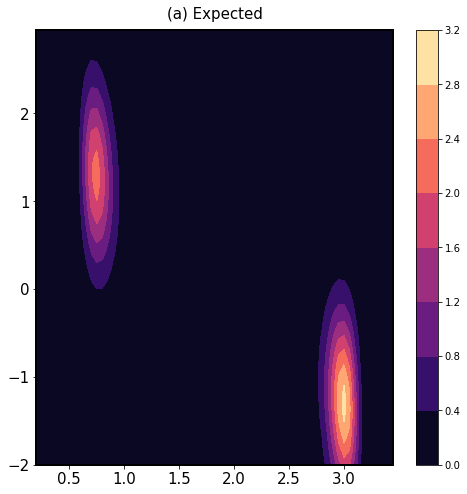

In [170]:
fig, ax = plt.subplots(figsize = (8, 8))
plt.contourf(rAB_II, x, exp, cmap="magma")
C = plt.colorbar()
_ = plt.xticks(fontsize = 15)
_ = plt.yticks(fontsize = 15)
_ = [i.set_linewidth(2) for i in ax.spines.values()]
plt.title('(a) Expected', fontsize = 15, y = 1.06)
plt.savefig(os.path.join(images_path, 'LEPS_expected.png'))

### PUT REMD POS PLOT HERE!

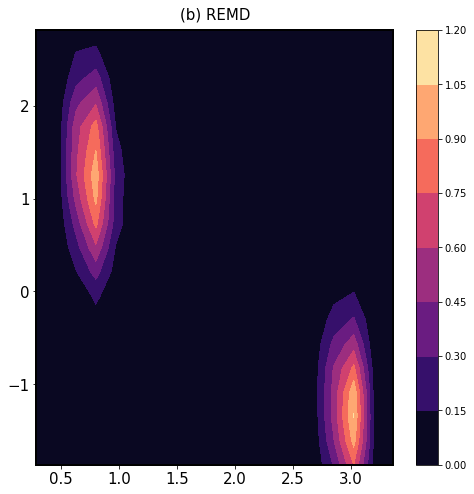

In [171]:
fig, ax = plt.subplots(figsize = (8, 8))
plt.contourf(x_a, y_a, H, cmap="magma")
C = plt.colorbar()
_ = plt.xticks(fontsize = 15)
_ = plt.yticks(fontsize = 15)
_ = [i.set_linewidth(2) for i in ax.spines.values()]
plt.title('(b) REMD', fontsize = 15, y = 1.06)
plt.savefig(os.path.join(images_path, 'LEPS_REMD_result.png'))

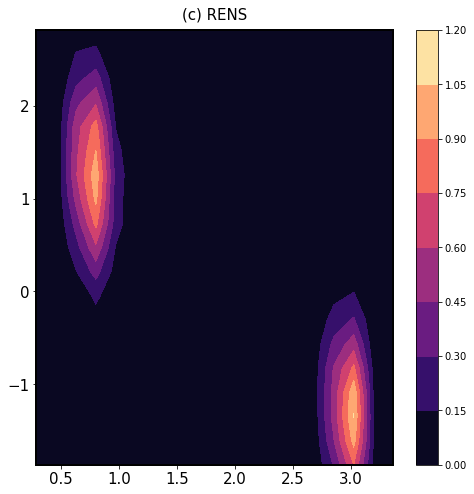

In [172]:
fig, ax = plt.subplots(figsize = (8, 8))
plt.contourf(x_a, y_a, H, cmap="magma")
C = plt.colorbar()
_ = plt.xticks(fontsize = 15)
_ = plt.yticks(fontsize = 15)
_ = [i.set_linewidth(2) for i in ax.spines.values()]
plt.title('(c) RENS', fontsize = 15, y = 1.06)
plt.savefig(os.path.join(images_path, 'LEPS_RENS_result.png'))

### CFT

In [235]:
file_loc = '/scratch/shaunak/leps_2_mod'

exchanges_leps = pd.read_csv(os.path.join(file_loc, 'rens_1/exchanges.txt'))

In [242]:
f_0 = Free_energy(1, 0.3)
f_1 = Free_energy(1, 1)

free = f_1 - f_0

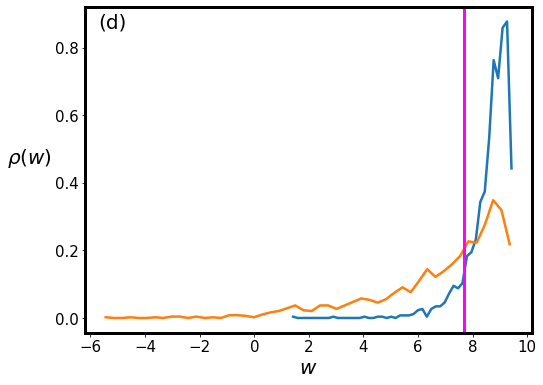

In [244]:
W_A = exchanges_leps['W_A']
W_B = exchanges_leps['W_B']

fig, ax = plt.subplots(figsize = (8, 6))
p, be = np.histogram(W_A, bins = 50, density = True)
coords = (be[1:] + be[:-1])/2
plt.plot(coords, p, lw = 2.5, label = r'$\rho_A (w)$')

p, be = np.histogram(W_B, bins = 50, density = True)
coords = (be[1:] + be[:-1]) / 2
plt.plot(-coords, p, lw = 2.5, label = r'$\rho_B (-w)$')

plt.axvline(x = free, color = 'magenta', lw = 3, label = r'$\Delta f$')
# plt.legend(loc = 'best', fontsize = 20)

plt.xlabel(r'$w$', fontsize = 20)
y = plt.ylabel(r'$\rho (w)$', fontsize = 20, labelpad = 25)
y.set_rotation(0)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.title('(d)', y = 0.98, x = 0.06, fontsize = 20)
_ = [i.set_linewidth(3) for i in ax.spines.values()]
plt.savefig(os.path.join(images_path, 'work_leps.png'), bbox_inches = 'tight')

In [237]:
file_loc = '/scratch/shaunak/LJ'

exchanges_LJ = pd.read_csv(os.path.join(file_loc, 'LJ_rens_2/exchanges.txt'))

In [246]:
assumed_delta_f = 170.7
free_lj = assumed_delta_f

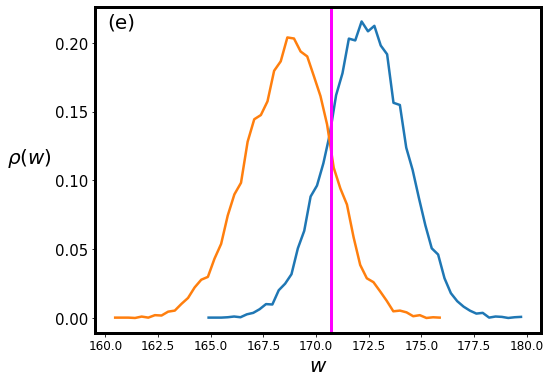

In [248]:
fig, ax = plt.subplots(figsize = (8, 6))
p, be = np.histogram(exchanges_LJ['W_A'], bins = 50, density = True)
coords = (be[1:] + be[:-1])/2
plt.plot(coords, p, lw = 2.5, label = r'$\rho_A (w)$')

p, be = np.histogram(exchanges_LJ['W_B'], bins = 50, density = True)
coords = (be[1:] + be[:-1]) / 2
plt.plot(-coords, p, lw = 2.5, label = r'$\rho_B (-w)$')

plt.axvline(x = free_lj, color = 'magenta', lw = 3, label = r'$\Delta f$')
# plt.legend(loc = 'best', fontsize = 20)

plt.xlabel(r'$w$', fontsize = 20)
y = plt.ylabel(r'$\rho (w)$', fontsize = 20, labelpad = 25)
y.set_rotation(0)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 12)
plt.title('(e)', y = 0.98, x = 0.06, fontsize = 20)
_ = [i.set_linewidth(3) for i in ax.spines.values()]
plt.savefig(os.path.join(images_path, 'work_lj.png'), bbox_inches = 'tight')